In [7]:
import torch
import h5py
import torchvision
import numpy as np
import time
import os
from PIL import Image
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
transform = transforms.Compose(
    [
        transforms.Resize(64),
        transforms.CenterCrop(64),
        transforms.ToTensor()
    ]
)
def showTorchImage(image):
    mode = transforms.ToPILImage()(image)
    plt.imshow(mode)
    plt.show()
path = os.path.join('./test_500/test/1' + '.jpg' )
fopen = Image.open(path)
data = transform(fopen)
image = data.view(1,3,64,64).cuda()
print('开始')
st = time.time()

开始


In [8]:
for i in range(1,500):
    path = os.path.join('./test_500/test/' + str(i+1) + '.jpg' )
    fopen = Image.open(path)
    data = transform(fopen)
    data = data.view(1,3,64,64).cuda()
    image = torch.cat((image,data),0)
    if i % 10 == 0:
        print('进行'+str(i)+'次')

进行10次
进行20次
进行30次
进行40次
进行50次
进行60次
进行70次
进行80次
进行90次
进行100次
进行110次
进行120次
进行130次
进行140次
进行150次
进行160次
进行170次
进行180次
进行190次
进行200次
进行210次
进行220次
进行230次
进行240次
进行250次
进行260次
进行270次
进行280次
进行290次
进行300次
进行310次
进行320次
进行330次
进行340次
进行350次
进行360次
进行370次
进行380次
进行390次
进行400次
进行410次
进行420次
进行430次
进行440次
进行450次
进行460次
进行470次
进行480次
进行490次


In [9]:
print(time.time()-st)

2.045351505279541


In [10]:
print(image.size())

torch.Size([500, 3, 64, 64])


In [11]:
import pandas as pd
train_y=pd.read_csv('test_500_label.csv')
train_y=np.array(train_y)
train_y=train_y[:,1].reshape(-1)
print(train_y)

[1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0
 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1
 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0
 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0
 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1
 1 1 0 1 1 0 0 1 1 1 0 0 

In [12]:
import h5py
f=h5py.File('test_true_dataset.h5',"w")
dset1=f.create_dataset('test_y',data=train_y)
dset2=f.create_dataset('test_x',data=image.cpu())
print(dset1.shape)
print(dset2.shape)

(500,)
(500, 3, 64, 64)


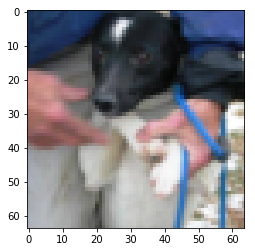

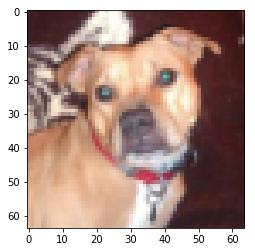

In [13]:
showTorchImage(image[0].cpu())
showTorchImage(image[1].cpu())

(500, 3, 64, 64) (500,)


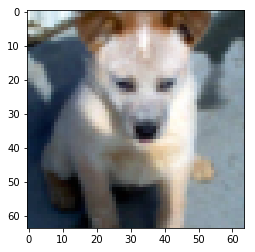

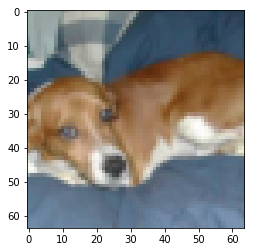

1
1


In [16]:
test_dataset=h5py.File('test_true_dataset.h5','r')
test_x=test_dataset['test_x'][:]
test_y=test_dataset['test_y'][:]
print(test_x.shape,test_y.shape)
test_x=torch.FloatTensor(test_x)
showTorchImage(test_x[368])
showTorchImage(test_x[25])
print(test_y[368])
print(test_y[25])